In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [4]:
data['Time'] = pd.to_datetime(data['Time'])

In [5]:
data.set_index('Time', inplace=True)

In [6]:
data.drop(columns=['ESI 1', 'ESI 2', 'ESI 3', 'ESI 4'], inplace=True)

In [7]:
esi1_daily = data['ESI 5'].resample('D').sum()

In [8]:
esi1_daily_df = esi1_daily.reset_index()

In [9]:
esi1_daily_df.columns = ['Date', 'ESI 5']

In [10]:
print(esi1_daily_df)

           Date  ESI 5
0    2017-01-01      2
1    2017-01-02      2
2    2017-01-03      4
3    2017-01-04      3
4    2017-01-05      1
...         ...    ...
1456 2020-12-27      5
1457 2020-12-28      8
1458 2020-12-29      9
1459 2020-12-30      8
1460 2020-12-31      3

[1461 rows x 2 columns]


In [11]:
train_size = int(len(esi1_daily_df) * 0.9) 
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(train.index).reshape(-1, 1))
y_train = train['ESI 5'].values

In [13]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [14]:
svr_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [15]:
X_test = scaler.transform(np.array(test.index).reshape(-1, 1))
forecast_values = svr_model.predict(X_test)

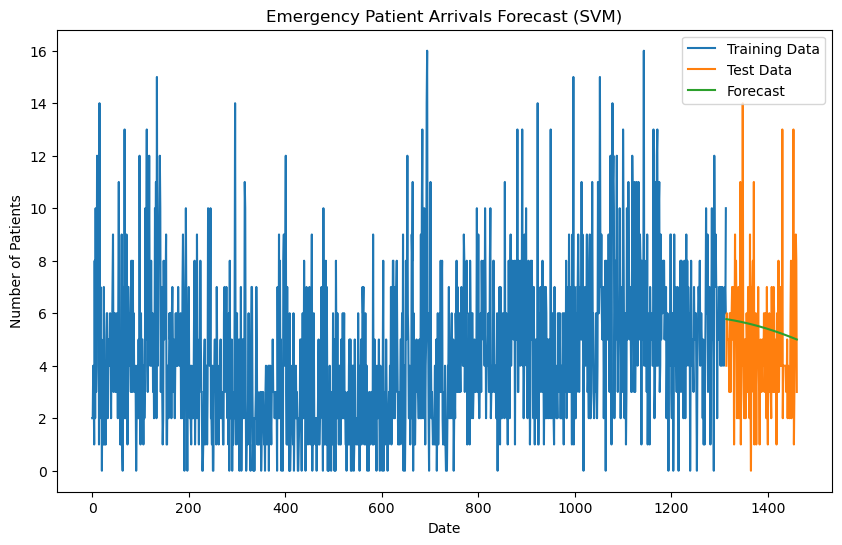

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 5'], label='Training Data')
plt.plot(test.index, test['ESI 5'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast (SVM)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [17]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [18]:
mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)

MAPE: inf


C:\Users\kriti\AppData\Local\Temp\ipykernel_22248\133553794.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - forecast) / actual)) * 100


In [19]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [20]:
rmse = root_mean_squared_error(test['ESI 5'], forecast_values)
print("RMSE:", rmse)

RMSE: 2.5105573834616512


In [21]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Find indices of zero values in y_true
    zero_indices = np.where(y_true == 0)[0]
    
    # Create a boolean mask to filter zero values
    mask = np.ones(len(y_true), dtype=bool)
    mask[zero_indices] = False
    
    # Filter y_true and y_pred using the mask
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    
    # Calculate absolute percentage error
    absolute_errors = np.abs(y_true_filtered - y_pred_filtered)
    
    # Calculate percentage errors
    percentage_errors = absolute_errors / y_true_filtered
    
    # Calculate mean absolute percentage error
    mape = np.mean(percentage_errors) * 100
    return mape


mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)

MAPE: 69.6449950654332


In [22]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 5'], forecast_values)
print("MAE:", mae)

MAE: 1.9811741007875918
